# Machine Exercise 5
### Prepared by: CAYAS, Ryan Roi [2022-22085]

## Prerequisites

We first import the required packages and load the necessary files.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold

from time import time


In [ ]:
def plot_2d(p1, col1, p2, col2, title):
    x1, y1 = p1.T
    x2, y2 = p2.T
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   facecolor="white", 
                                   constrained_layout=True)
    ax1.scatter(x1, y1, c=col1, s=30, alpha=0.8)
    ax1.set_title('S-curve: '+title, size=10)
    ax2.scatter(x2, y2, c=col2, s=30, alpha=0.8)
    ax2.set_title('Swiss Roll: '+title, size=10)
    fig.set_figheight(3)
    plt.show()

In [10]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [11]:
# Normalize data
scalerX = StandardScaler()
X_norm = scalerX.fit_transform(X)

## Part 1: Dimensionality Reduction

In [14]:
# Local Linear Embedding
lle_standard = manifold.LocallyLinearEmbedding(n_neighbors=200, random_state=0)
X_lle = lle_standard.fit_transform(X_norm)

# t-SNE
tsne = manifold.TSNE(perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(X_norm)

# Isomap
iso = manifold.Isomap(n_neighbors=200)
X_iso = iso.fit_transform(X_norm)

# Laplacian Eigenmap
spec = manifold.SpectralEmbedding(n_neighbors=200)
X_spec = spec.fit_transform(X_norm)

# Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=0.01)
X_kpca = kpca.fit_transform(X_norm)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_norm)

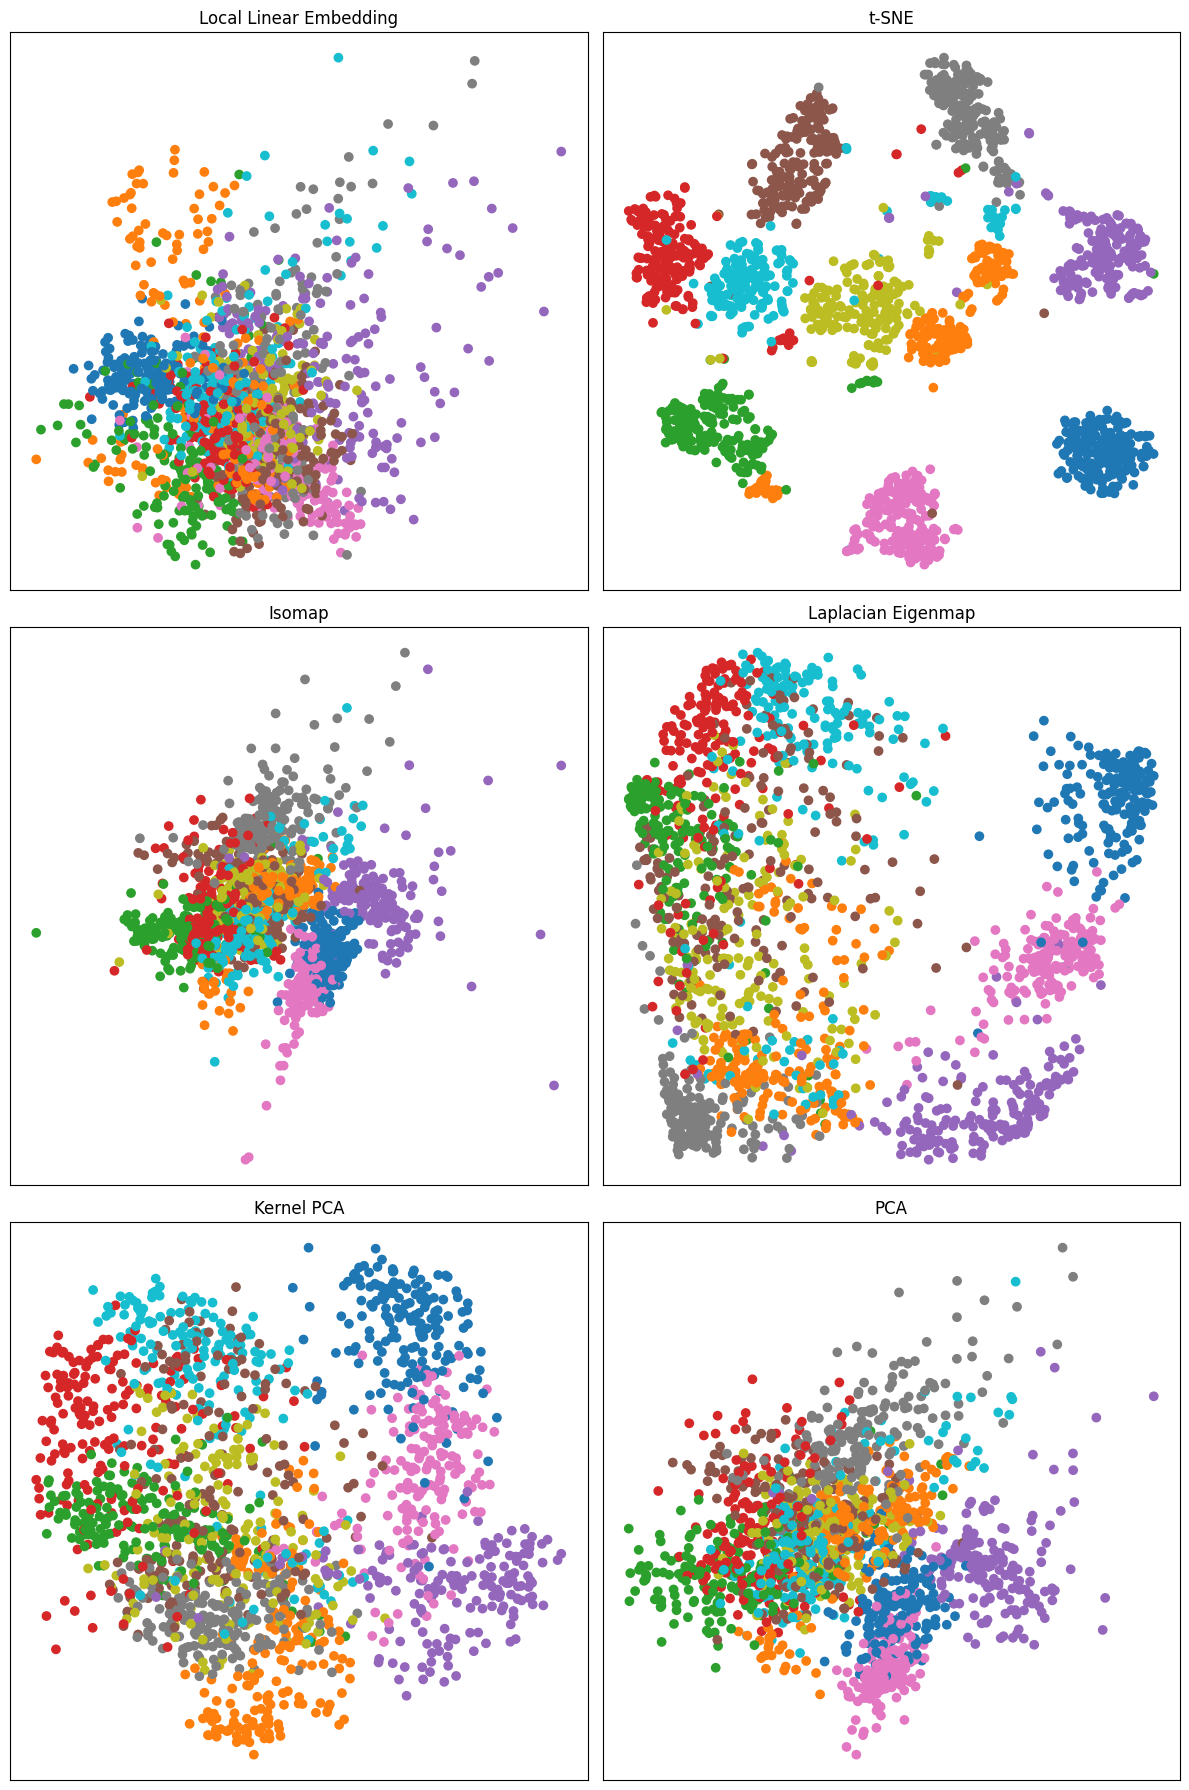

In [15]:
# Plotting each 2D projection
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Subplot titles
titles = ['Local Linear Embedding', 't-SNE', 'Isomap', 'Laplacian Eigenmap', 'Kernel PCA', 'PCA']

# Data to plot
projections = [X_lle, X_tsne, X_iso, X_spec, X_kpca, X_pca]

for i, ax in enumerate(axs.flat):
    projection = projections[i]
    ax.scatter(projection[:, 0], projection[:, 1], c=y, cmap=plt.cm.tab10)
    ax.set_title(titles[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

t-SNE produced the clearest clustering of data points per digit label among all 6 dimensionality reduction techniques.

## Part 2: Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [28]:
# WITH DIMENSIONALITY REDUCTION
svc_kpca_pipeline = make_pipeline(StandardScaler(),
                             KernelPCA(kernel='sigmoid', n_components=40),
                             SVC()
                             )


svc_kpca_pipeline.fit(X_train, y_train)
y_pred_svc_kpca = svc_kpca_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_svc_kpca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        52
           9       0.98      1.00      0.99        54

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [29]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_svc_kpca)}')
print(f'Test Weighted F1 Score: {f1_score(y_test, y_pred_svc_kpca, average="weighted")}')

Test Accuracy: 0.9981481481481481
Test Weighted F1 Score: 0.9981479893680871


In [26]:
# WITHOUT DIMENSIONALITY REDUCTION
svc_pipeline = make_pipeline(StandardScaler(),
                             SVC()
                             )


svc_pipeline.fit(X_train, y_train)
y_pred_svc = svc_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.98      0.98        55
           2       1.00      0.98      0.99        53
           3       1.00      0.96      0.98        55
           4       0.91      0.96      0.94        54
           5       1.00      1.00      1.00        55
           6       0.98      0.96      0.97        54
           7       0.98      1.00      0.99        54
           8       0.96      0.98      0.97        52
           9       1.00      0.98      0.99        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [27]:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(f'Test Weighted F1 Score: {f1_score(y_test, y_pred_svc, average="weighted")}')

Test Accuracy: 0.9814814814814815
Test Weighted F1 Score: 0.9816138804681078


Performing dimensionality reduction improved the test performance for classification.